# The Kids Rights Index Statistical Modeling

<right><strong>Summary</strong></right>

<p style="text-align: center;">In this notebook i delve into the relationship of the metrics used in The Kids Rights Index report.</p>

## Initialization

In [5]:
# Main libraries

import os
import tabula as tb
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

## Data Extraction

In [7]:
# files in the directory

path = (r'C:\Users\domingosdeeularia\...KidsRightsIndex\Scoretables')

files_list = os.listdir(path)

files_list

['The-KidsRights-Index-2013_Scoretable.pdf',
 'The-KidsRights-Index-2014_Scoretable.pdf',
 'The-KidsRights-Index-2015_Scoretable.pdf',
 'The-KidsRights-Index-2016_Scoretable.pdf',
 'The-KidsRights-Index-2017_Scoretable.pdf',
 'The-KidsRights-Index-2018_Scoretable.pdf',
 'The-KidsRights-Index-2019_Scoretable.pdf',
 'The-KidsRights-Index-2020_Scoretable.pdf',
 'The-KidsRights-Index-2021_Scoretable.pdf',
 'The-KidsRights-Index-2022_Scoretable.pdf',
 'The-KidsRights-Index-2023_Scoretable.pdf',
 'The-KidsRights-Index-2024_Scoretable.pdf']

In [8]:
# This step is meant to extract the tables and concatenate them

table_list = []
actual_cols = ['country', 'overall_score', 'life', 'health', 'education', 'protection', 'environment']

for file in files_list:
    table = tb.read_pdf(path + '/' + file, stream = True, pages = 'all')
    df_table = pd.concat([table[i].iloc[4:, 1:8] for i in range(len(table))])
    df_table.columns = actual_cols
    table_list.append(df_table)

df_kri = pd.concat(table_list)

## Data Preprocessing

In [10]:
# Replacing every  ',' with '.'

df_kri = df_kri.apply(lambda col: col.str.replace(',', '.'))

In [11]:
# Dropping missing values

df_kri.dropna(inplace = True)
df_kri.head()

,country,overall_score,life,health,education,protection,environment
4,Slovenia,0.857,0.99,1.00,0.82,0.98,0.58
5,Iceland,0.856,1.00,1.00,0.83,0.93,0.60
6,Switzerland,0.852,0.98,1.00,0.80,0.98,0.58
7,Ireland,0.848,0.99,1.00,0.83,0.92,0.58
8,Sweden,0.833,0.99,1.00,0.83,0.97,0.50


In [12]:
# Replacing any non-numeric value by 'x'

df_kri.iloc[:,1:] = df_kri.iloc[:,1:].map(lambda cell: 'x' if cell[0].isnumeric() == False else cell)

In [13]:
# Replacing 'x' with most frequent terms

imp = SimpleImputer(missing_values = 'x', strategy = 'most_frequent')
imp_array = imp.fit_transform(df_kri)

In [14]:
# Passing the imputation array to a dataframe

df_kri = pd.DataFrame(data = imp_array, columns = actual_cols)
df_kri.head()

,country,overall_score,life,health,education,protection,environment
0,Slovenia,0.857,0.99,1.00,0.82,0.98,0.58
1,Iceland,0.856,1.00,1.00,0.83,0.93,0.60
2,Switzerland,0.852,0.98,1.00,0.80,0.98,0.58
3,Ireland,0.848,0.99,1.00,0.83,0.92,0.58
4,Sweden,0.833,0.99,1.00,0.83,0.97,0.50


In [15]:
# Converting numeric values to float

for col in actual_cols[1:]:
    df_kri[col] = df_kri[col].astype(float)

In [16]:
# Re-checking the dtypes

df_kri.dtypes

country           object
overall_score    float64
life             float64
health           float64
education        float64
protection       float64
environment      float64
dtype: object

## Statistical Analysis

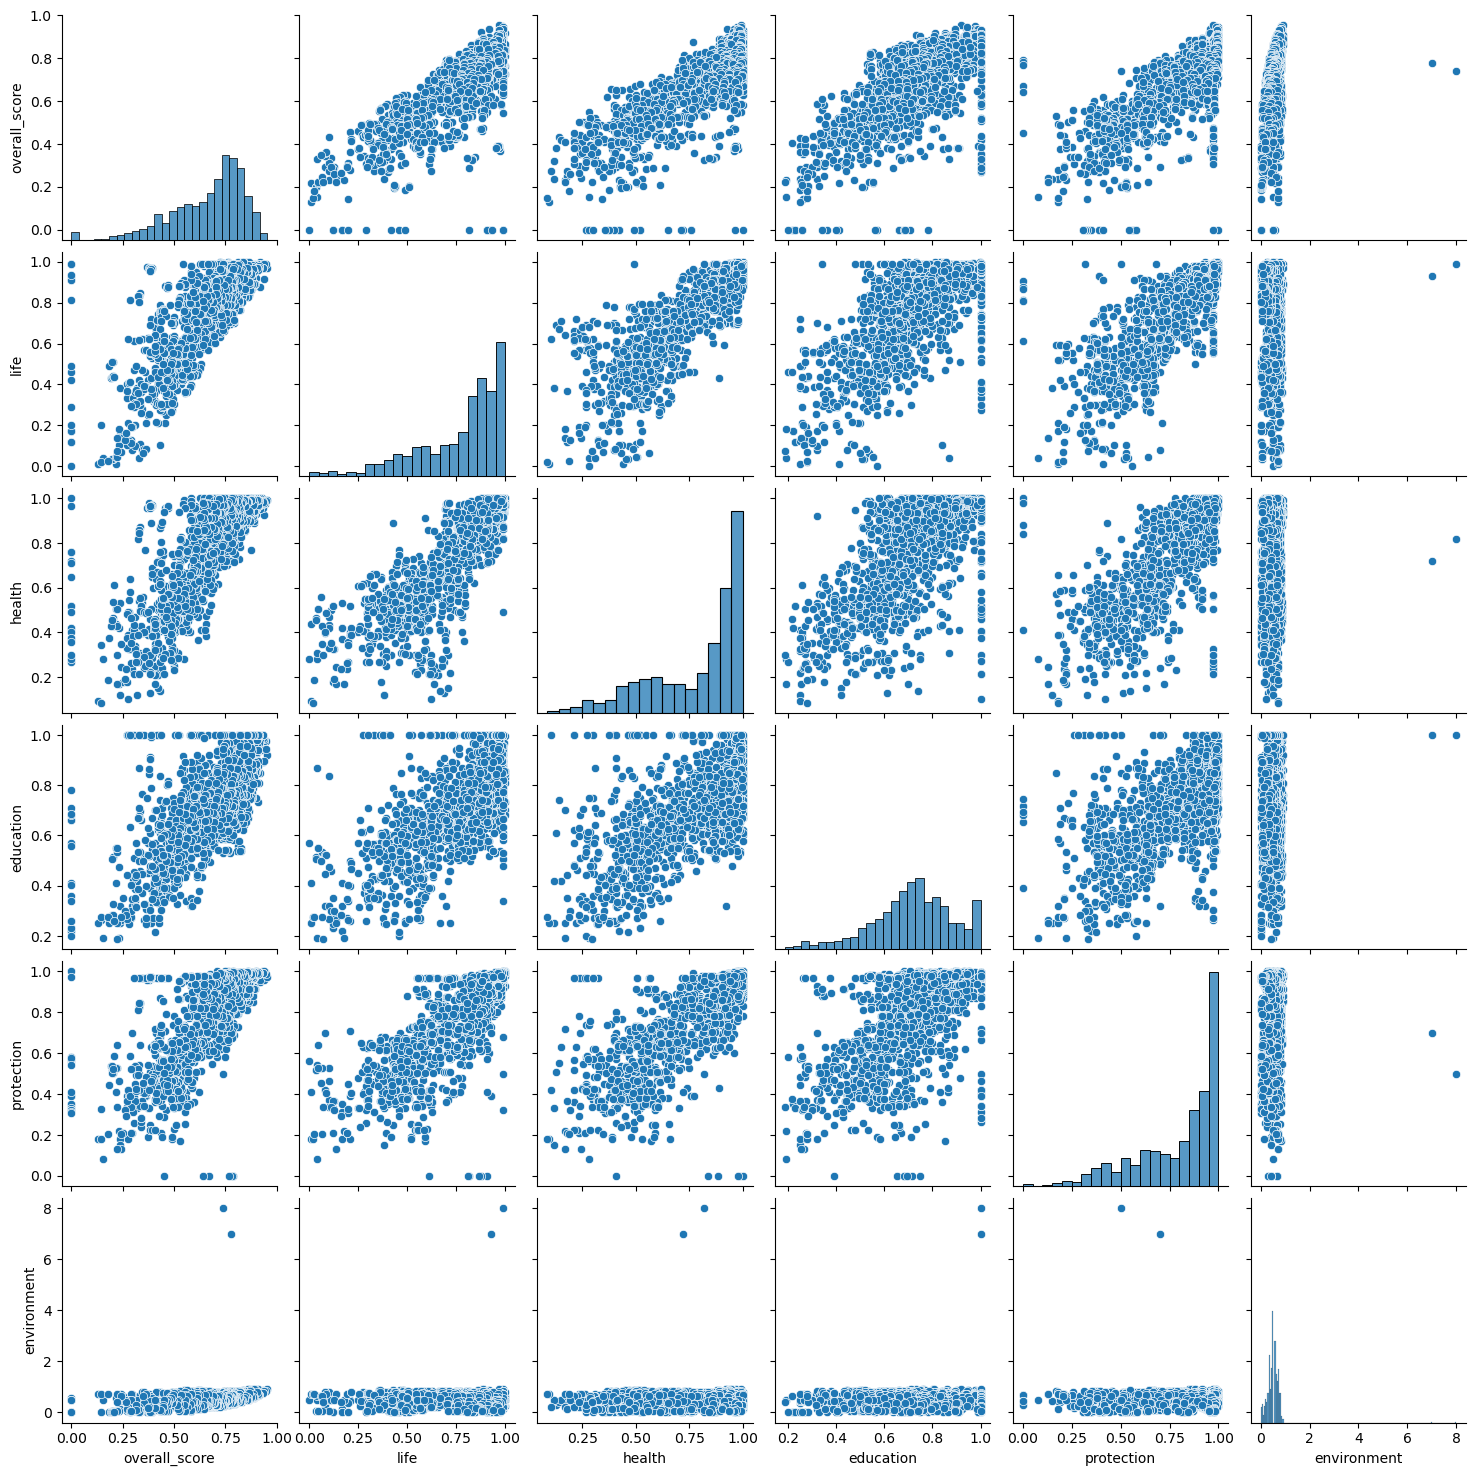

In [18]:
# Displaying the pairplot

sns.pairplot(df_kri)
plt.show()

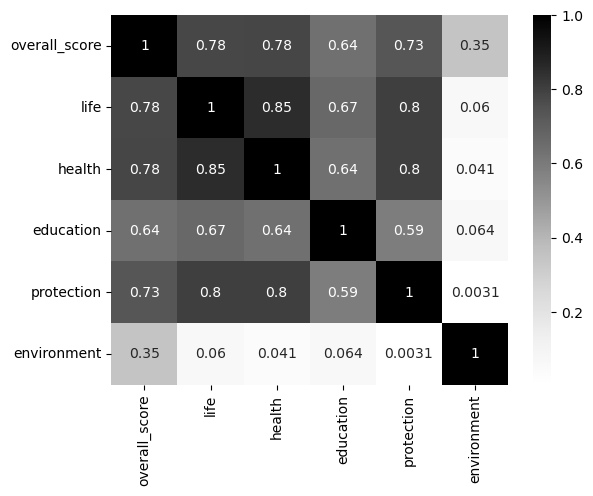

In [19]:
# Correlation Heatmap

sns.heatmap(df_kri.iloc[:, 1:].corr(), annot = True, cmap = 'Greys')
plt.show()

In [20]:
# Setting the statistical model

X,y = df_kri.iloc[:, 2:], df_kri.overall_score
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [21]:
# Results Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1238.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:52:57   Log-Likelihood:                 1901.2
No. Observations:                1776   AIC:                            -3790.
Df Residuals:                    1770   BIC:                            -3758.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0086      0.010     -0.897      0.370      -0.027       0.010
life            0.1803      0.020      9.105      0.000       0.141       0.219
health          0.2678      0.019     13.973      0.000       0.230       0.305
education       0.1390      0.016      8.654      0.000       0.108       0.171
protection      0.1784      0.017     10.488      0.000       0.145       0.212
environment     0.1744      0.006     27.525      0.000       0.162       0.187
==============================================================================
Omnibus:                     2110.157   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289842.150
Skew:                          -6.059   Prob(JB):                         0.00
Kurtosis:                      64.400   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Closing Remarks

                  ________  ________   _______   ______ 
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ / 
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  